# 0. Import packages

In [1]:
import os
import json
import umap
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# 1. NeuroCartography

### 1-1. Load NeuroCartography-generated embeddings

In [2]:
def load_json(file_path):
    with open(file_path) as f:
        data = json.load(f)
    return data

def extract_model_name_from_dir_name(name):
    return name.split('=')[0][4:-7]

In [3]:
root_path = '/raid/NeuEvo/data/embedding/_etc/_independent-embedding-vgg16-0.01'
apdx = 'topk_s=20-dim=30-lr_emb=0.01-num_emb_epochs=100-num_emb_negs=3'

In [4]:
file_paths = []
model_nicknames = []
for dir_name in os.listdir(root_path):
    if dir_name == 'fig':
        continue
    file_path = f'{root_path}/{dir_name}/data/emb/emb.json'
    file_paths.append(file_path)
    model_nickname = extract_model_name_from_dir_name(dir_name)
    model_nicknames.append(model_nickname.replace('-', '_'))

In [5]:
emb = {}
num_total_neurons = 0
dim = -1
for model_nickname, file_path in zip(model_nicknames, file_paths):
    model_nickname = model_nickname.replace('-', '_')
    emb[model_nickname] = load_json(file_path)
    num_total_neurons += len(emb[model_nickname])
    if dim == -1:
        dim = len(list(emb[model_nickname].values())[0])

## 1-2. Neurocartography 2D embeddings

In [6]:
# Generate X for all neurons' vector
X = np.zeros((num_total_neurons, dim))

idx = 0
idx2id_all = {}
id2idx_all = {}
for model_nickname in emb:
    for neuron_i, neuron in enumerate(emb[model_nickname]):
        neuron_id = '{}-{}'.format(model_nickname, neuron)
        idx2id_all[idx] = neuron_id
        id2idx_all[neuron_id] = idx
        X[idx] = emb[model_nickname][neuron]
        idx += 1

In [7]:
# Fit and transform
reducer = umap.UMAP(n_components=2, verbose=True)
fitted_emb2d = reducer.fit_transform(X)
X_2d = reducer.transform(X)

UMAP( verbose=True)
Thu Feb  2 20:51:45 2023 Construct fuzzy simplicial set
Thu Feb  2 20:51:45 2023 Finding Nearest Neighbors
Thu Feb  2 20:51:45 2023 Building RP forest with 15 trees


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Thu Feb  2 20:51:45 2023 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	 5  /  15
	 6  /  15
	 7  /  15
	Stopping threshold met -- exiting after 7 iterations
Thu Feb  2 20:52:13 2023 Finished Nearest Neighbor Search
Thu Feb  2 20:52:15 2023 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Thu Feb  2 20:52:36 2023 Finished embedding


In [8]:
# Parse embeddings into emb2d
emb2d = {}
for i, emb in enumerate(X_2d):
    emb_arr = emb.tolist()
    instance_id = idx2id_all[i]
    model_nickname = instance_id.split('-')[0]
    neuron_id = '-'.join(instance_id.split('-')[1:])
    if model_nickname not in emb2d:
        emb2d[model_nickname] = {}
    emb2d[model_nickname][neuron_id] = emb_arr

## 1-3. Visualize Neurocartography 2D embedding

In [9]:
def make_dir(dir_path):
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)

In [105]:
# neurons = {}

# # Bird head neurons 
# key = 'bird-head'
# neurons[key] = {}

# neurons[key][0] = [
#     'Sequential_0_Conv2d_21-52',
#     'Sequential_0_Conv2d_24-4',
#     'Sequential_0_Conv2d_26-11',
#     'Sequential_0_Conv2d_26-38',
# ]

# neurons[key][1] = [
#     'Sequential_0_Conv2d_17-291',
#     'Sequential_0_Conv2d_26-232',
#     'Sequential_0_Conv2d_28-189',
#     'Sequential_0_Conv2d_19-95',
#     'Sequential_0_Conv2d_7-20',
#     'Sequential_0_Conv2d_14-46',
#     'Sequential_0_Conv2d_28-27',
# ]


# neurons[key][5] = [
#     'Sequential_0_Conv2d_21-309',
#     'Sequential_0_Conv2d_24-139',
#     'Sequential_0_Conv2d_24-381',
#     'Sequential_0_Conv2d_24-459',
#     'Sequential_0_Conv2d_26-78',
#     'Sequential_0_Conv2d_26-146',
#     'Sequential_0_Conv2d_26-277',
#     'Sequential_0_Conv2d_28-126',
# ]

# neurons[key][21] = [
#     'Sequential_0_Conv2d_21-9',
#     'Sequential_0_Conv2d_21-19',
#     'Sequential_0_Conv2d_21-127',
#     'Sequential_0_Conv2d_21-134',
#     'Sequential_0_Conv2d_24-33',
#     'Sequential_0_Conv2d_24-36',
#     'Sequential_0_Conv2d_24-94',
#     'Sequential_0_Conv2d_24-185',
#     'Sequential_0_Conv2d_24-202',
#     'Sequential_0_Conv2d_26-124',
#     'Sequential_0_Conv2d_26-132',
#     'Sequential_0_Conv2d_26-161',
#     'Sequential_0_Conv2d_26-172',
#     'Sequential_0_Conv2d_26-183',
#     'Sequential_0_Conv2d_26-233',
#     'Sequential_0_Conv2d_26-249',
#     'Sequential_0_Conv2d_26-265',
#     'Sequential_0_Conv2d_26-315',
# ]

# neurons[key][207] = [
#     'Sequential_0_Conv2d_21-9',
#     'Sequential_0_Conv2d_21-19',
#     'Sequential_0_Conv2d_21-42',
#     'Sequential_0_Conv2d_21-84',
#     'Sequential_0_Conv2d_21-127',
#     'Sequential_0_Conv2d_21-34',
#     'Sequential_0_Conv2d_24-10',
#     'Sequential_0_Conv2d_24-17',
#     'Sequential_0_Conv2d_24-18',
#     'Sequential_0_Conv2d_24-20',
#     'Sequential_0_Conv2d_24-44',
#     'Sequential_0_Conv2d_24-69',
#     'Sequential_0_Conv2d_26-21',
#     'Sequential_0_Conv2d_26-65',
#     'Sequential_0_Conv2d_26-78',
#     'Sequential_0_Conv2d_26-94',
#     'Sequential_0_Conv2d_26-109',
#     'Sequential_0_Conv2d_28-24',
#     'Sequential_0_Conv2d_28-27',
#     'Sequential_0_Conv2d_28-56',
#     'Sequential_0_Conv2d_28-107',
#     'Sequential_0_Conv2d_28-111',
#     'Sequential_0_Conv2d_28-126',
#     'Sequential_0_Conv2d_28-165',
# ]

# # Bird body neurons
# key = 'bird-body'
# neurons[key] = {}

# neurons[key][0] = [
#     'Sequential_0_Conv2d_26-11',
#     'Sequential_0_Conv2d_28-246',
# ]

# neurons[key][1] = [
# ]

# neurons[key][5] = [
#     'Sequential_0_Conv2d_24-458',
#     'Sequential_0_Conv2d_26-21',
#     'Sequential_0_Conv2d_26-74',
#     'Sequential_0_Conv2d_26-112',
#     'Sequential_0_Conv2d_26-118',
#     'Sequential_0_Conv2d_26-229',
#     'Sequential_0_Conv2d_28-38',
# ]

# neurons[key][21] = [
#     'Sequential_0_Conv2d_21-309',
#     'Sequential_0_Conv2d_24-121',
#     'Sequential_0_Conv2d_26-180',
#     'Sequential_0_Conv2d_26-229',
#     'Sequential_0_Conv2d_26-327',
#     'Sequential_0_Conv2d_26-346',
#     'Sequential_0_Conv2d_26-413',
# ]

# neurons[key][207] = [
#     'Sequential_0_Conv2d_24-121',
#     'Sequential_0_Conv2d_26-26',
#     'Sequential_0_Conv2d_26-83',
#     'Sequential_0_Conv2d_26-112',
#     'Sequential_0_Conv2d_28-11',
#     'Sequential_0_Conv2d_28-59',
#     'Sequential_0_Conv2d_28-154',
# ]

# # Bird leg neurons
# key = 'bird-legs'
# neurons[key] = {}

# neurons[key][0] = []

# neurons[key][1] = []

# neurons[key][5] = [
#     # 'Sequential_0_Conv2d_26-262',
#     # 'Sequential_0_Conv2d_28-185',
#     # 'Sequential_0_Conv2d_28-199',
#     # 'Sequential_0_Conv2d_28-232',
# ]

# neurons[key][21] = [
#     # 'Sequential_0_Conv2d_26-118',
#     # 'Sequential_0_Conv2d_26-153',
# ]

# neurons[key][207] = [
#     # 'Sequential_0_Conv2d_21-49',
# ]




In [110]:
neurons = {}

# Bird head neurons 
key = 'car'
neurons[key] = {}

neurons[key][0] = [
]

neurons[key][1] = [
]

neurons[key][2] = [
    'Sequential_0_Conv2d_28-48',
    'Sequential_0_Conv2d_28-149',
    'Sequential_0_Conv2d_28-162',
    'Sequential_0_Conv2d_28-201',
    'Sequential_0_Conv2d_28-212',
    'Sequential_0_Conv2d_28-240',
    'Sequential_0_Conv2d_28-247',
    'Sequential_0_Conv2d_28-428',
]

neurons[key][5] = [
    'Sequential_0_Conv2d_28-48',
    'Sequential_0_Conv2d_28-77',
    'Sequential_0_Conv2d_28-116',
    'Sequential_0_Conv2d_28-147',
    'Sequential_0_Conv2d_28-162',
    'Sequential_0_Conv2d_28-175',
    'Sequential_0_Conv2d_28-210',
    'Sequential_0_Conv2d_28-212',
]

neurons[key][207] = [
    'Sequential_0_Conv2d_24-45',
    'Sequential_0_Conv2d_24-192',
    'Sequential_0_Conv2d_26-34',
    'Sequential_0_Conv2d_26-70',
    'Sequential_0_Conv2d_26-75',
    'Sequential_0_Conv2d_26-95',
    'Sequential_0_Conv2d_26-115',
    'Sequential_0_Conv2d_26-126',
    'Sequential_0_Conv2d_26-147',
]





In [89]:
X_range, Y_range = [1000, -1000], [1000, -1000]
for model_nickname in emb2d:
    for neuron in emb2d[model_nickname]:
        x, y = emb2d[model_nickname][neuron]
        X_range[0] = min(X_range[0], x)
        X_range[1] = max(X_range[1], x)
        Y_range[0] = min(Y_range[0], y)
        Y_range[1] = max(Y_range[1], y)
        
X_range[0] -= 0.1
X_range[1] += 0.1
Y_range[0] -= 0.1
Y_range[1] += 0.1

print('X_range:', X_range)
print('Y_range:', Y_range)

X_range: [-6.5491105079650875, 7.790259933471679]
Y_range: [-5.7547026634216305, 6.650048828125]


In [90]:
fig_dir = f'{root_path}/fig'
make_dir(fig_dir)

Sequential_0_Conv2d_24-45 [1.549272   0.98737365]
Sequential_0_Conv2d_24-192 [1.7750317 1.0699109]
Sequential_0_Conv2d_26-34 [1.8942821 1.1115143]
Sequential_0_Conv2d_26-70 [1.595087  1.2257669]
Sequential_0_Conv2d_26-75 [-1.3028183 -2.157653 ]
Sequential_0_Conv2d_26-95 [1.9027895 1.0886983]
Sequential_0_Conv2d_26-115 [-1.385742  -2.1917057]
Sequential_0_Conv2d_26-126 [-1.3425632 -2.1140366]
Sequential_0_Conv2d_26-147 [1.8827816 1.0325115]


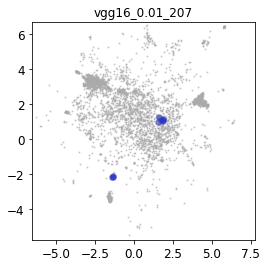

Sequential_0_Conv2d_28-48 [ 0.30355093 -2.2916317 ]
Sequential_0_Conv2d_28-77 [ 0.38490176 -2.3437    ]
Sequential_0_Conv2d_28-116 [ 0.361308  -2.3115754]
Sequential_0_Conv2d_28-147 [ 0.3593028 -2.29952  ]
Sequential_0_Conv2d_28-162 [ 0.387811  -2.3143458]
Sequential_0_Conv2d_28-175 [ 0.35698205 -2.2659101 ]
Sequential_0_Conv2d_28-210 [ 0.374275  -2.2976918]
Sequential_0_Conv2d_28-212 [ 0.34843215 -2.3018007 ]


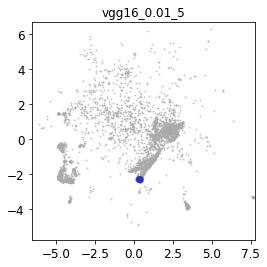

Sequential_0_Conv2d_28-48 [ 1.6553096 -2.9950602]
Sequential_0_Conv2d_28-149 [ 1.6099949 -3.1673179]
Sequential_0_Conv2d_28-162 [ 1.5884509 -3.1794205]
Sequential_0_Conv2d_28-201 [ 1.6842533 -2.8211129]
Sequential_0_Conv2d_28-212 [ 1.5915135 -3.175705 ]
Sequential_0_Conv2d_28-240 [ 1.5681877 -3.1552398]
Sequential_0_Conv2d_28-247 [ 1.6548256 -2.7907634]
Sequential_0_Conv2d_28-428 [ 1.6209244 -3.1446772]


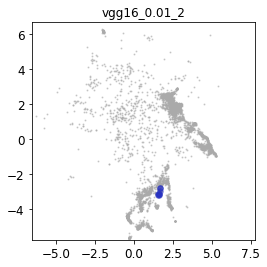

In [111]:
colors = {
    'bird-head': '#2832C2',
    'bird-body': '#E56717',
    'bird-legs': '#E56717'
}
    
for model_nickname in emb2d:
    epoch = int(model_nickname.split('_')[-1])
    if epoch not in [2, 5, 207]:
        continue
    
    Xs = [emb2d[model_nickname][neuron][0] for neuron in emb2d[model_nickname]]
    Ys = [emb2d[model_nickname][neuron][1] for neuron in emb2d[model_nickname]]
    
    plt.figure(figsize=(4, 4))
    plt.xlim(X_range)
    plt.ylim(Y_range)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(model_nickname)
    
    plt.scatter(Xs, Ys, s=1, alpha=0.5, color='#AAAAAA')

    for key in neurons:
        target_neurons = neurons[key][epoch]
        target_idxs = np.array([id2idx_all[f'{model_nickname}-{neuron_id}'] for neuron_id in target_neurons])
        if len(target_idxs) > 0:
            target_Xs = X_2d[target_idxs][:, 0]
            target_Ys = X_2d[target_idxs][:, 1]
            plt.scatter(target_Xs, target_Ys, s=30, alpha=0.5, c='#2832C2')
            for target_neuron, target_idx in zip(target_neurons, target_idxs):
                print(target_neuron, X_2d[target_idx])

    plt.savefig(f'{fig_dir}/{model_nickname}-car.png')
    plt.savefig(f'{fig_dir}/{model_nickname}-car.svg')
    plt.show()

# 2. ACE (Broden dataset)

## 2-1. Bird concepts

In [13]:
ace_data_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

ace_images = datasets.ImageFolder(
    '../../../../Broden/dataset/broden1_227/parsed_images',
    ace_data_transform
)

def show_imgs(img_idxs):
    for img_idx in img_idxs:
        img = ace_images[img_idx][0]
        img = np.einsum('kij->ijk', img)
        plt.title(f'img: {img_idx}')
        plt.imshow(img)
        plt.show()

In [14]:
img_file_lst = sorted(os.listdir('../../../../Broden/dataset/broden1_227/parsed_images/object'))

In [102]:
bird_body_imgs = [
    # '2008_000103.jpg',
    # '2008_000131.jpg',
    # '2008_000192.jpg',
    # '2008_000339.jpg',
    # # '2008_000361.jpg',
    # # '2008_000512.jpg',
    '2008_000515.jpg',
    '2008_000532.jpg',
    '2008_000533.jpg',
    # '2008_000832.jpg',
    '2008_003831.jpg',
    '2008_000960.jpg',
    # '2009_000998.jpg',
    # # '2009_001166.jpg',
    # # '2009_000370.jpg',
    # # '2008_001185.jpg',
    # # '2008_001194.jpg',
    # # '2008_001351.jpg',
    # '2008_001387.jpg',
    # # '2008_001514.jpg',
    # '2008_006002.jpg',
    # '2008_006282.jpg',
    # # '2008_001522.jpg',
    # '2009_001242.jpg',
    # # '2009_001422.jpg',
    # # '2009_005076.jpg',
    # '2010_000222.jpg',
    '2008_007709.jpg',
    # # '2008_008022.jpg',
    '2008_008166.jpg',
    # '2008_008194.jpg',
    '2008_008455.jpg',
    '2008_008506.jpg',
]

bird_head_imgs = [
    # '2008_000318.jpg',
    # '2008_004075.jpg',
    # # '2008_004317.jpg',
    # '2008_000350.jpg',
    # # '2008_005080.jpg',
    # '2008_005477.jpg',
    # # '2008_005724.jpg',
    # '2008_000678.jpg',
    # '2008_007501.jpg',
    # '2009_001348.jpg',
    # # '2009_001570.jpg',
    # # '2009_001807.jpg',
    # # '2009_004686.jpg',
    # # '2010_000075.jpg',
    # '2008_008544.jpg',
    # '2009_000674.jpg',
    # '2009_000958.jpg',
    # Cars
    '2009_000591.jpg',
    '2009_000602.jpg',
    '2009_000611.jpg',
    '2009_000634.jpg',
    '2009_000648.jpg',
    '2009_000821.jpg',
    '2009_000882.jpg',
    '2009_000990.jpg',
]

bird_body_img_idxs = [img_file_lst.index(bird_img) for bird_img in bird_body_imgs]
bird_head_img_idxs = [img_file_lst.index(bird_img) for bird_img in bird_head_imgs]

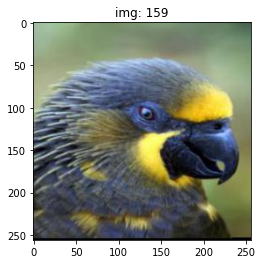

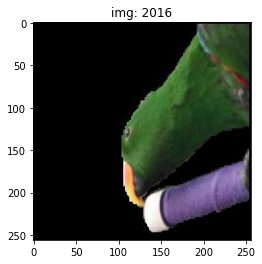

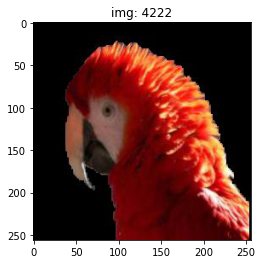

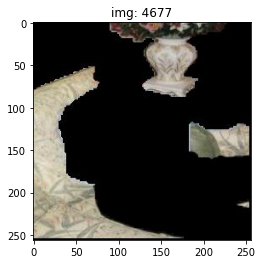

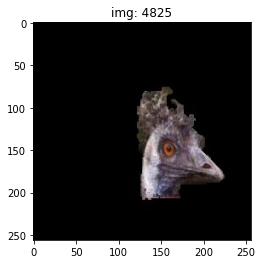

In [16]:
show_imgs(bird_head_img_idxs)

## 2-2. Load embedding

In [17]:
def get_emb_path(epoch):
    ace_root_path = '/raid/NeuEvo/data/layer_act'
    return os.path.join(ace_root_path, f'vgg16_0.01_{epoch}_broden/data/Sequential_2_Linear_6/img_emb.txt')

In [18]:
epochs = [1, 2, 5, 21, 207]
ace_emb = {}
with tqdm(total=len(epochs)) as pbar:
    for epoch in epochs:
        ace_emb[epoch] = np.loadtxt(get_emb_path(epoch))
        pbar.update(1)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:46<00:00, 21.20s/it]


## 2-3. 2D embedding

In [19]:
num_imgs = len(img_file_lst)
num_total_instance = len(epochs) * num_imgs
dim = 1000

In [30]:
last_epoch_X = ace_emb[epochs[-1]]

In [32]:
reducer_ace = umap.UMAP(n_components=2, verbose=True)
reducer_ace = reducer_ace.fit(last_epoch_X)

UMAP( verbose=True)
Thu Feb  2 20:57:11 2023 Construct fuzzy simplicial set
Thu Feb  2 20:57:11 2023 Finding Nearest Neighbors
Thu Feb  2 20:57:11 2023 Building RP forest with 14 trees
Thu Feb  2 20:57:12 2023 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	 5  /  15
	Stopping threshold met -- exiting after 5 iterations
Thu Feb  2 20:57:16 2023 Finished Nearest Neighbor Search
Thu Feb  2 20:57:16 2023 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Thu Feb  2 20:57:34 2023 Finished embedding


In [34]:
X_2d_ace_dict = {}
with tqdm(total=len(epochs)) as pbar:
    for i, epoch in enumerate(epochs):
        X_2d_ace_dict[epoch] = reducer_ace.transform(ace_emb[epoch])
        pbar.update(1)

  0%|                                                                                                                           | 0/5 [00:00<?, ?it/s]

Thu Feb  2 20:57:56 2023 Forward diversification reduced edges from 484650 to 123259
Thu Feb  2 20:57:58 2023 Reverse diversification reduced edges from 123259 to 123259
Thu Feb  2 20:58:00 2023 Degree pruning reduced edges from 153310 to 150682
Thu Feb  2 20:58:00 2023 Resorting data and graph based on tree order
Thu Feb  2 20:58:00 2023 Building and compiling search function


Epochs completed:   0%|            0/30 [00:00]

 20%|███████████████████████                                                                                            | 1/5 [00:50<03:21, 50.32s/it]

Epochs completed:   0%|            0/30 [00:00]

 40%|██████████████████████████████████████████████                                                                     | 2/5 [01:30<02:12, 44.10s/it]

Epochs completed:   0%|            0/30 [00:00]

 60%|█████████████████████████████████████████████████████████████████████                                              | 3/5 [02:15<01:28, 44.50s/it]

Epochs completed:   0%|            0/30 [00:00]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:56<00:00, 35.35s/it]


## 2-4. Draw 2D embedding

In [35]:
def get_fig_path(epoch, opt, ext):
    return f'/raid/NeuEvo/data/layer_act/vgg16_0.01_{epoch}_broden/data/Sequential_2_Linear_6/emb-{opt}.{ext}'

In [36]:
X_range_ace, Y_range_ace = [1000, -1000], [1000, -1000]
for epoch in epochs:
    for v in X_2d_ace_dict[epoch]:
        x, y = v[0], v[1]
        X_range_ace[0] = min(X_range_ace[0], x)
        X_range_ace[1] = max(X_range_ace[1], x)
        Y_range_ace[0] = min(Y_range_ace[0], y)
        Y_range_ace[1] = max(Y_range_ace[1], y)
        
X_range_ace[0] -= 0.1
X_range_ace[1] += 0.1
Y_range_ace[0] -= 0.1
Y_range_ace[1] += 0.1

print('X_range_ace:', X_range_ace)
print('Y_range_ace:', Y_range_ace)

X_range_ace: [-0.43950075507164, 10.302567100524902]
Y_range_ace: [0.18465712070465087, 9.204931831359863]


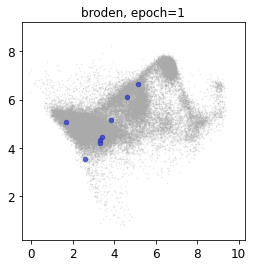

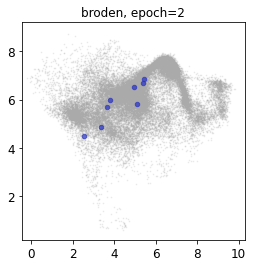

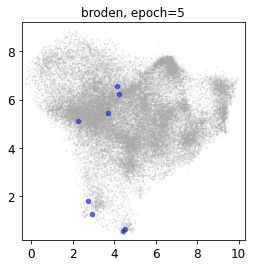

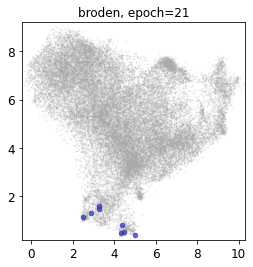

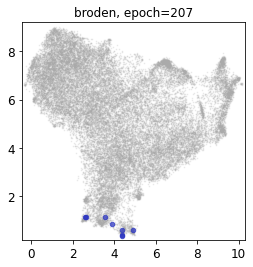

In [104]:
for epoch in epochs:
    Xs = X_2d_ace_dict[epoch][:, 0]
    Ys = X_2d_ace_dict[epoch][:, 1]
    
    plt.figure(figsize=(4, 4))
    plt.scatter(Xs, Ys, s=0.5, alpha=0.2, c='#AAAAAA')
    plt.xlim(X_range_ace)
    plt.ylim(Y_range_ace)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(f'broden, epoch={epoch}')
    plt.savefig(f'{get_fig_path(epoch, "gray", "png")}')
    plt.savefig(f'{get_fig_path(epoch, "gray", "svg")}')

    highlight_vecs = X_2d_ace_dict[epoch][np.array(bird_head_img_idxs)]
    plt.scatter(highlight_vecs[:, 0], highlight_vecs[:, 1], s=20, alpha=0.7, c='#2832C2')
    # highlight_vecs = X_2d_ace_dict[epoch][np.array(bird_body_img_idxs)]
    # plt.scatter(highlight_vecs[:, 0], highlight_vecs[:, 1], s=20, alpha=0.7, c='#2832C2')
    
    plt.savefig(f'{get_fig_path(epoch, "highlight-car", "png")}')
    plt.savefig(f'{get_fig_path(epoch, "highlight-car", "svg")}')
    plt.show()

In [93]:
last_epoch_emb = X_2d_ace_dict[207]

In [94]:
last_epoch_emb.shape

(32310, 2)

In [95]:
idxs = []
for i, v in enumerate(last_epoch_emb):
    x = v[0]
    y = v[1]
    if y < 1:
        idxs.append(i)

In [96]:
len(idxs)

710

In [98]:
idx2id[idxs[0]]

NameError: name 'idx2id' is not defined

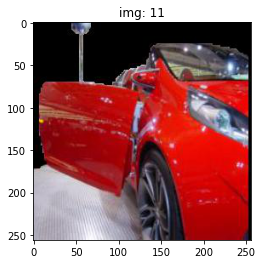

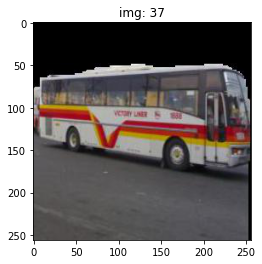

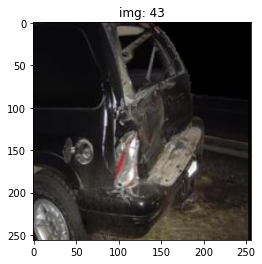

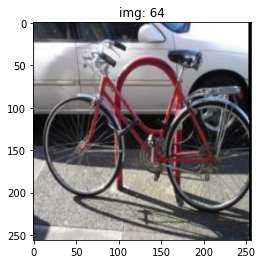

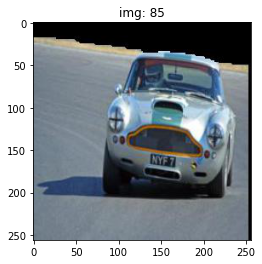

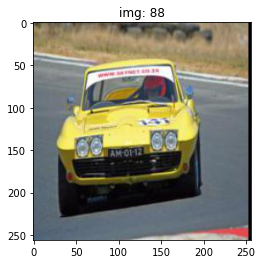

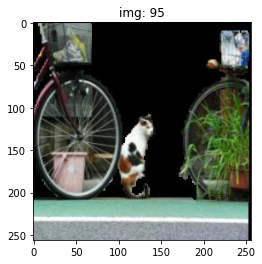

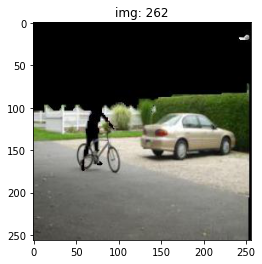

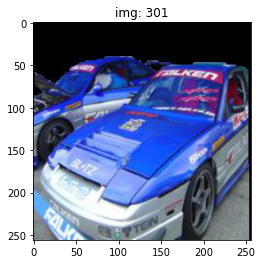

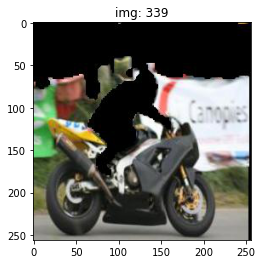

In [97]:
show_imgs(idxs[:10])